# Statistical Machine Learning - Assignment 1

### Authors

Student 1

* Name: Christoph Schmidl
* Studentnumber: s4226887
* Studentemail: c.schmidl@student.ru.nl

Student 2

* Name: Mark Beijer
* Studentnumber: s4354834
* Studentemail: mbeijer@science.ru.nl

## Exercise 1.1

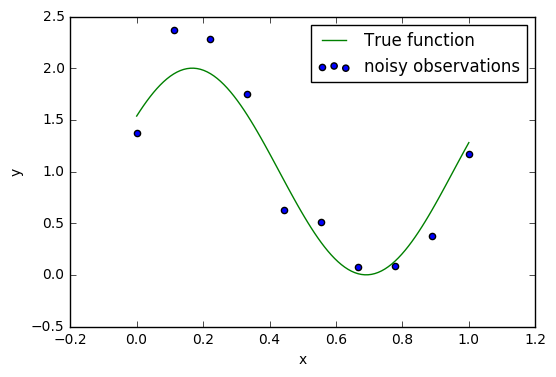

In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
# Return evenly spaced numbers over a specified interval.

# Exercise 1.1

def f(x):
	return 1 + np.sin(6*(x-2))

def noisy_function(func, func_argument):
	noise = np.random.normal(0, 0.3)
	return noise + func(func_argument)

def generate_data(amount_of_datapoints):
    return [noisy_function(f, x) for x in np.linspace(0, 1, amount_of_datapoints)]

def plot_data(dataset):
    # plot the dataset
    plt.scatter(np.linspace(0, 1, 10), dataset, label='noisy observations')
    # plot the actual function
    X = np.linspace(0, 1, 100) # the higher the num value, the smoother the function plot gets
    y = [f(x) for x in X]
    plt.plot(X, y, color='green', label='True function')
    # plt.xlim(xmin=0)
    plt.ylabel('y')
    plt.xlabel('x')
    plt.legend(loc='upper right')
    # fancy caption. Not needed if latex is doing the job later on
    #txt="I need the caption to be present a little below X-axis"
    #plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)
    plt.savefig('exercise_1_1.png')
    plt.show()

# Generating data set D_10 of 10 noisy observations
training_set = generate_data(10)

# Generating data set T of 100 noisy observations
test_set = generate_data(100)

# Plotting the function and observations in D_10
plot_data(training_set)


## Exercise 1.2

In [43]:
# Exercise 1.2

def SSE(observations, targets):
    """ Calculate the sum-of-squares error. """
    return 0.5 * np.sum((observations - targets)**2)


def pol_cur_fit(data, polynomial_order):
    """ Return weights for an optimal polynomial curve fit. """
    
    polynomial_order = polynomial_order + 1
    
    observations = data[0, :] # Get me the first row, D_N
    targets = data[1, :] # Get me the second row, M
    
    # observation matrix
    A = np.zeros((polynomial_order, polynomial_order)) # Create matrix
    for i in range(polynomial_order):
        for j in range(polynomial_order):
            A[i, j] = np.sum(observations ** (i+j))
    
    # target vector        
    B = np.zeros(polynomial_order)
    for i in range(polynomial_order):
        B[i] = np.sum(targets * observations**i)
    
    # numpy.linalg.solve(a, b)
    # Solve a linear matrix equation, or system of linear scalar equations.
    # Computes the “exact” solution, x, of the well-determined, i.e., full rank, linear matrix equation ax = b.
    
    # Here's where the magic happens. Solve the linear system.
    weights = np.linalg.solve(A, B)
    return weights


## Exercise 1.3

Evaluated polynomial: [ 0.99500473  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473
  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473
  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473
  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473
  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473
  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473
  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473
  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473
  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473
  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473
  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473
  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473
  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473
  0.99500473  0.99500473  0.9

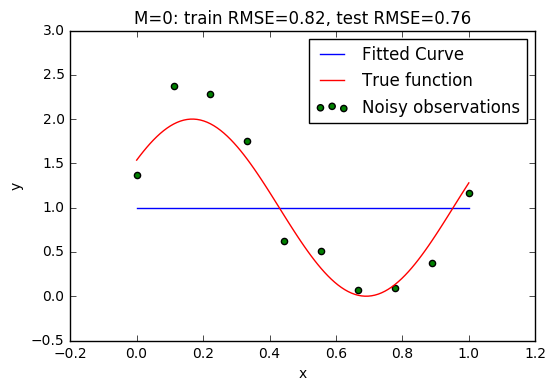

Evaluated polynomial: [ 1.83684385  1.819837    1.80283015  1.7858233   1.76881645  1.75180959
  1.73480274  1.71779589  1.70078904  1.68378219  1.66677534  1.64976849
  1.63276164  1.61575479  1.59874794  1.58174108  1.56473423  1.54772738
  1.53072053  1.51371368  1.49670683  1.47969998  1.46269313  1.44568628
  1.42867943  1.41167258  1.39466572  1.37765887  1.36065202  1.34364517
  1.32663832  1.30963147  1.29262462  1.27561777  1.25861092  1.24160407
  1.22459722  1.20759036  1.19058351  1.17357666  1.15656981  1.13956296
  1.12255611  1.10554926  1.08854241  1.07153556  1.05452871  1.03752185
  1.020515    1.00350815  0.9865013   0.96949445  0.9524876   0.93548075
  0.9184739   0.90146705  0.8844602   0.86745335  0.85044649  0.83343964
  0.81643279  0.79942594  0.78241909  0.76541224  0.74840539  0.73139854
  0.71439169  0.69738484  0.68037799  0.66337113  0.64636428  0.62935743
  0.61235058  0.59534373  0.57833688  0.56133003  0.54432318  0.52731633
  0.51030948  0.49330262  0.4

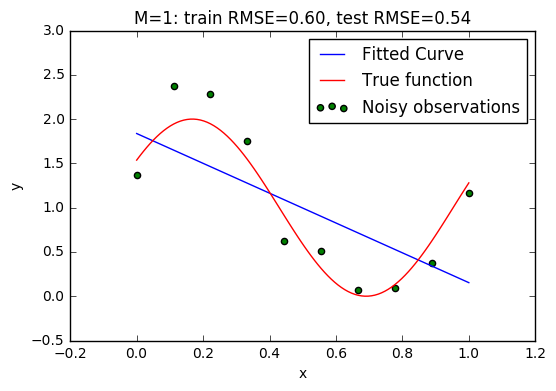

Evaluated polynomial: [ 2.15780157  2.11913228  2.08090508  2.04311998  2.00577696  1.96887604
  1.93241721  1.89640046  1.86082581  1.82569325  1.79100278  1.75675439
  1.7229481   1.6895839   1.65666179  1.62418177  1.59214385  1.56054801
  1.52939426  1.4986826   1.46841304  1.43858556  1.40920018  1.38025688
  1.35175568  1.32369656  1.29607954  1.26890461  1.24217176  1.21588101
  1.19003235  1.16462578  1.1396613   1.11513891  1.09105861  1.0674204
  1.04422428  1.02147026  0.99915832  0.97728847  0.95586072  0.93487505
  0.91433148  0.89422999  0.8745706   0.85535329  0.83657808  0.81824496
  0.80035393  0.78290498  0.76589813  0.74933337  0.7332107   0.71753012
  0.70229163  0.68749524  0.67314093  0.65922871  0.64575858  0.63273055
  0.6201446   0.60800075  0.59629898  0.58503931  0.57422172  0.56384623
  0.55391283  0.54442152  0.53537229  0.52676516  0.51860012  0.51087717
  0.50359631  0.49675754  0.49036087  0.48440628  0.47889378  0.47382337
  0.46919506  0.46500883  0.46

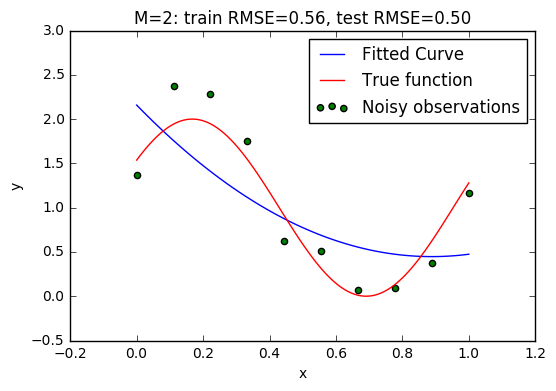

Evaluated polynomial: [  1.58280389e+00   1.63723152e+00   1.68711262e+00   1.73255005e+00
   1.77364667e+00   1.81050533e+00   1.84322890e+00   1.87192022e+00
   1.89668216e+00   1.91761758e+00   1.93482934e+00   1.94842029e+00
   1.95849329e+00   1.96515120e+00   1.96849687e+00   1.96863318e+00
   1.96566296e+00   1.95968909e+00   1.95081442e+00   1.93914181e+00
   1.92477412e+00   1.90781420e+00   1.88836491e+00   1.86652911e+00
   1.84240966e+00   1.81610943e+00   1.78773125e+00   1.75737800e+00
   1.72515253e+00   1.69115771e+00   1.65549638e+00   1.61827140e+00
   1.57958564e+00   1.53954196e+00   1.49824320e+00   1.45579224e+00
   1.41229192e+00   1.36784511e+00   1.32255466e+00   1.27652343e+00
   1.22985428e+00   1.18265007e+00   1.13501365e+00   1.08704789e+00
   1.03885565e+00   9.90539771e-01   9.42203123e-01   8.93948562e-01
   8.45878946e-01   7.98097134e-01   7.50705983e-01   7.03808352e-01
   6.57507098e-01   6.11905080e-01   5.67105156e-01   5.23210185e-01
   4.8032302

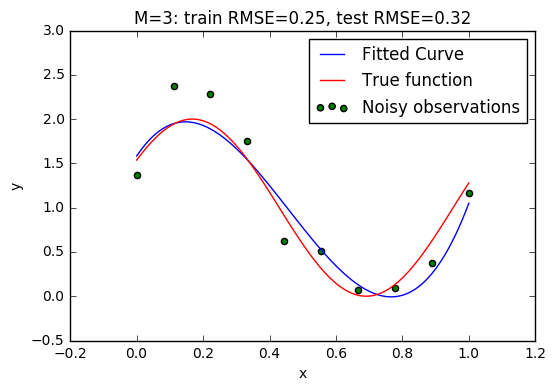

Evaluated polynomial: [ 1.50601907  1.58807214  1.66275393  1.73030715  1.79097161  1.84498417
  1.89257883  1.93398662  1.96943571  1.9991513   2.02335574  2.0422684
  2.05610579  2.06508148  2.06940613  2.06928749  2.0649304   2.05653677
  2.04430562  2.02843303  2.00911219  1.98653336  1.9608839   1.93234825
  1.90110793  1.86734155  1.83122482  1.79293051  1.7526285   1.71048575
  1.6666663   1.62133128  1.57463891  1.52674449  1.47780041  1.42795614
  1.37735826  1.3261504   1.27447331  1.2224648   1.17025979  1.11799026
  1.06578529  1.01377107  0.96207083  0.91080492  0.86009076  0.81004287
  0.76077284  0.71238937  0.66499822  0.61870225  0.5736014   0.52979272
  0.4873703   0.44642536  0.4070462   0.36931817  0.33332375  0.29914249
  0.26685102  0.23652307  0.20822943  0.18203801  0.1580138   0.13621884
  0.11671231  0.09955044  0.08478655  0.07247106  0.06265148  0.05537237
  0.05067543  0.0485994   0.04918013  0.05245055  0.05844069  0.06717764
  0.07868559  0.09298583  0.11

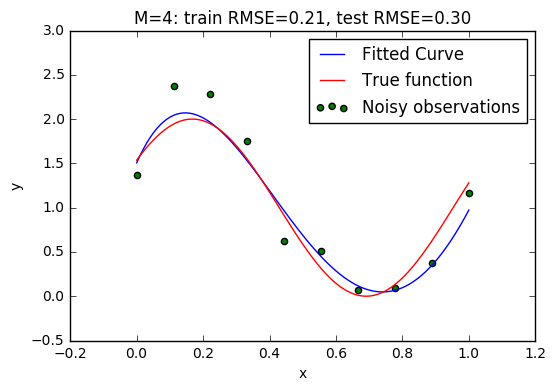

Evaluated polynomial: [ 1.44546159  1.57868024  1.69592597  1.79819039  1.88642647  1.9615493
  2.02443683  2.07593065  2.1168367   2.14792606  2.1699357   2.18356919
  2.18949749  2.18835971  2.18076383  2.16728748  2.14847865  2.1248565
  2.09691209  2.06510909  2.0298846   1.99164985  1.95079099  1.90766981
  1.8626245   1.81597042  1.76800083  1.71898767  1.66918228  1.61881616
  1.56810173  1.5172331   1.46638677  1.41572244  1.36538373  1.31549891
  1.26618174  1.21753209  1.16963683  1.12257046  1.07639596  1.03116548
  0.98692112  0.94369566  0.90151335  0.86039061  0.82033683  0.78135511
  0.74344297  0.70659317  0.67079442  0.63603212  0.60228916  0.56954664
  0.53778461  0.50698284  0.4771216   0.44818235  0.42014853  0.39300632
  0.36674536  0.34135955  0.31684774  0.29321454  0.27047103  0.24863553
  0.22773436  0.20780257  0.18888473  0.17103563  0.15432107  0.1388186
  0.12461826  0.11182338  0.10055127  0.09093399  0.08311913  0.07727055
  0.0735691   0.07221342  0.0734

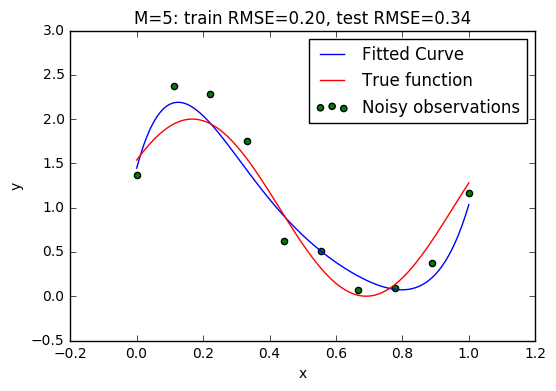

Evaluated polynomial: [ 1.40087866  1.63993145  1.83679203  1.99591786  2.12144954  2.21722462
  2.28679101  2.33342027  2.3601205   2.36964899  2.36452461  2.34703993
  2.31927302  2.28309898  2.24020128  2.19208268  2.140076    2.08535451
  2.02894216  1.9717234   1.91445285  1.85776459  1.80218122  1.74812268
  1.69591471  1.64579709  1.59793159  1.55240966  1.50925978  1.46845464
  1.42991793  1.39353093  1.3591388   1.32655658  1.29557494  1.26596562
  1.23748662  1.20988711  1.18291206  1.15630656  1.12981994  1.10320954
  1.07624422  1.04870763  1.02040116  0.99114665  0.96078876  0.92919715
  0.89626832  0.8619272   0.82612845  0.78885747  0.75013121  0.70999856
  0.66854065  0.62587066  0.58213357  0.53750544  0.49219258  0.4464303
  0.40048146  0.35463478  0.30920276  0.26451942  0.22093773  0.17882674
  0.13856849  0.1005546   0.06518256  0.03285182  0.00395955 -0.0211039
 -0.04195975 -0.05824586 -0.06962206 -0.07577579 -0.07642799 -0.07133922
 -0.06031617 -0.04321833 -0.019

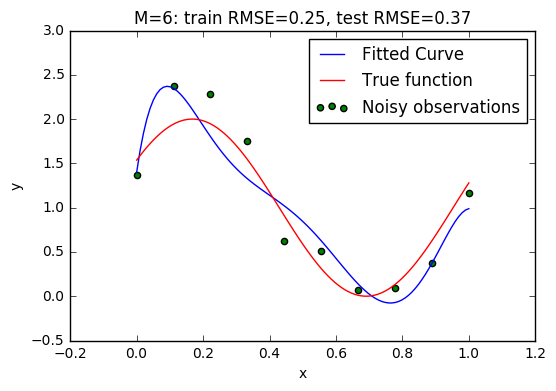

Evaluated polynomial: [ 1.42874408  1.41119045  1.4358553   1.4919003   1.56996095  1.66202329
  1.76130676  1.8621529   1.95991992  2.05088286  2.13213933  2.20152052
  2.25750761  2.29915315  2.3260075   2.33805004  2.33562513  2.31938263
  2.29022277  2.24924546  2.19770356  2.13696036  2.06845079  1.99364648
  1.91402434  1.83103871  1.74609672  1.66053699  1.5756113   1.49246919
  1.4121454   1.33554991  1.26346055  1.19651795  1.13522275  1.07993491
  1.03087502  0.98812741  0.95164499  0.92125564  0.89667     0.87749062
  0.86322219  0.85328285  0.84701633  0.84370485  0.84258267  0.84285007
  0.84368765  0.8442709   0.84378475  0.84143815  0.83647829  0.82820465
  0.81598245  0.7992555   0.77755834  0.75052747  0.7179115   0.67958024
  0.63553239  0.58590185  0.53096246  0.47113102  0.40696843  0.33917893
  0.26860712  0.19623284  0.12316358  0.05062435 -0.020055   -0.08745542
 -0.15008709 -0.20641098 -0.25486367 -0.29388543 -0.32195178 -0.33760879
 -0.33951193 -0.32646904 -0.2

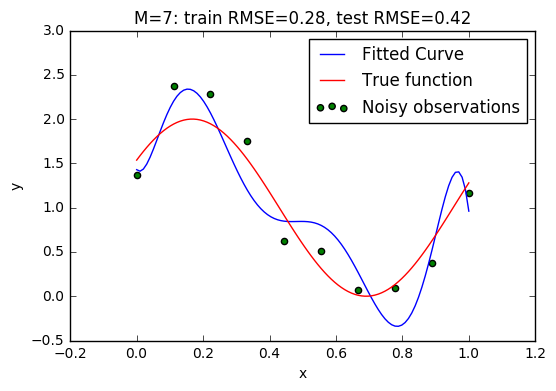

Evaluated polynomial: [ 1.43617984  0.98256181  0.74435441  0.6711489   0.72015402  0.85540435
  1.0470243   1.27054531  1.50627398  1.7387087   1.95600251  2.14947015
  2.31313686  2.44332705  2.53829055  2.59786468  2.62316991  2.61633733
  2.58026606  2.51840869  2.43458309  2.33280877  2.21716614  2.09167714
  1.96020546  1.8263751   1.69350547  1.56456195  1.44212023  1.32834332
  1.22496982  1.13331228  1.05426448  0.98831643  0.93557619  0.89579715
  0.86841024  0.85255966  0.84714168  0.85084536  0.86219457  0.87959058
  0.90135442  0.92576856  0.95111713  0.97572426  0.99799014  1.0164241
  1.02967459  1.03655567  1.03606952  1.02742508  1.01005229  0.98361208
  0.94800181  0.90335624  0.85004399  0.78865963  0.72001139  0.64510474
  0.56512203  0.48139846  0.39539464  0.30866617  0.22283062  0.13953231
  0.06040556 -0.01296327 -0.07907407 -0.13655123 -0.18418087 -0.22094648
 -0.2460621  -0.25900218 -0.25952722 -0.24770424 -0.22392105 -0.18889335
 -0.14366343 -0.08958941 -0.02

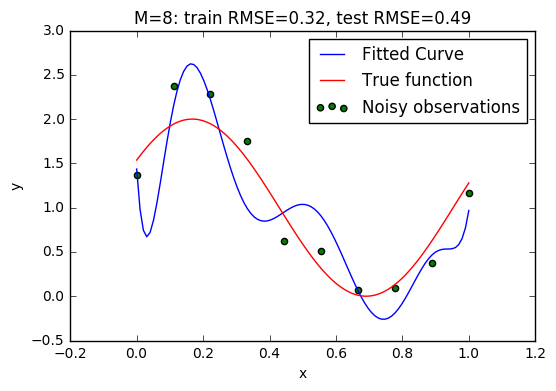

Evaluated polynomial: [ 1.43667552  0.57183917  0.10664806 -0.05896088 -0.00792195  0.19182277
  0.48538192  0.82915576  1.18924757  1.54003392  1.86288285  2.14500937
  2.37845822  2.55920432  2.68636164  2.76149194  2.78800493  2.77064213
  2.71503691  2.62734365  2.51392946  2.38112207  2.23500808  2.08127601
  1.92509892  1.77105187  1.6230595   1.48436977  1.35754983  1.24450044
  1.14648573  1.0641752   0.99769521  0.9466876   0.91037302  0.88761709
  0.8769976   0.87687119  0.8854381   0.900804    0.92103777  0.9442245
  0.96851325  0.99215879  1.01355733  1.03127592  1.04407538  1.05092705
  1.05102335  1.04378247  1.02884761  1.00608105  0.97555375  0.93753079
  0.8924535   0.84091866  0.78365559  0.72150175  0.65537749  0.58626064
  0.51516157  0.44309936  0.37107964  0.30007465  0.23100597  0.16473037
  0.10202907  0.04360066 -0.00994213 -0.0580719  -0.10034215 -0.13637945
 -0.16587233 -0.18855751 -0.20420406 -0.21259646 -0.21351735 -0.20673142
 -0.19197167 -0.16892966 -0.13

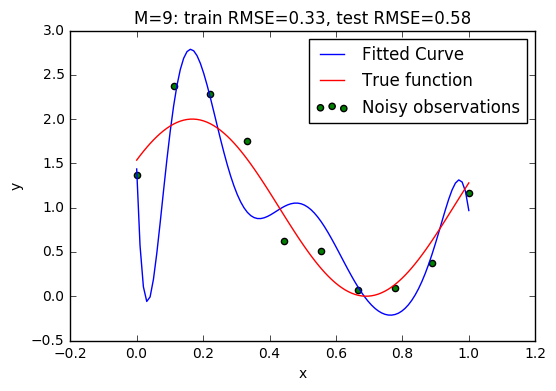

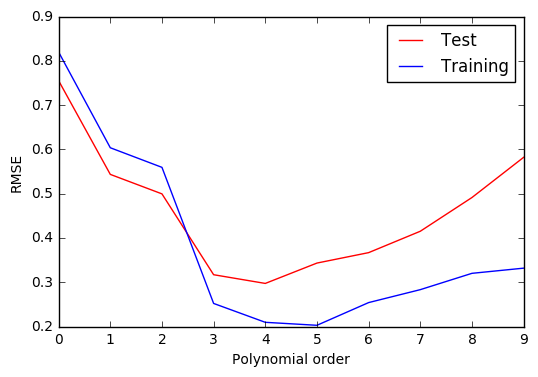

[0.81969349324535368, 0.60363297075666311, 0.55935869179200592, 0.25207803473118007, 0.20944804491299529, 0.20273422684815051, 0.25400426187294567, 0.28321197141976884, 0.32006403079758455, 0.33174863239636859]
[0.75507127792556628, 0.54348013346841395, 0.49947083843613266, 0.31692708260180236, 0.29726404203594275, 0.3432377613407912, 0.36679464245879395, 0.41507529249839298, 0.49125136377856093, 0.58199341272363581]


In [47]:
# Exercise 1.3

def evaluate_polynomial(point, weights):
    """ Evaluate a polynomial. """
    return np.polyval(list(reversed(weights)), point)

def RMSE(observations, targets):
    """ Calculate the root-mean-squared error. """
    error = SSE(observations, targets)
    return np.sqrt(2 * error / len(observations))


def evaluate_and_plot_curve_fitting(training_set, test_set, min_polynomial_order = 0, max_polynomial_order = 10):
    """Evaluate the RMSE based on different polynomial orders"""
    
    errors_train = []
    errors_test = []
    
    X = np.linspace(0, 1, 100)
    y = [f(x) for x in X]
    
    for m in range(min_polynomial_order, max_polynomial_order):
        w = pol_cur_fit(training_data, m)
        fitted_curve = evaluate_polynomial(X, w)
        
        print("Evaluated polynomial: {}".format(fitted_curve))

        rmse_train = RMSE(evaluate_polynomial(training_set[0, :], w), training_set[1, :])
        rmse_test = RMSE(evaluate_polynomial(test_set[0, :], w), test_set[1, :])
        errors_train.append(rmse_train)
        errors_test.append(rmse_test)
        
        plt.figure()
        plt.plot(X, fitted_curve, 'b', label='Fitted Curve')
        plt.plot(X, y, 'r', label='True function')
        plt.scatter(training_set[0, :], training_set[1, :], c='g', label='Noisy observations')
        plt.title('M=%d: train RMSE=%.2f, test RMSE=%.2f' % (m, rmse_train, rmse_test))
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
        plt.savefig('curvefit_m%d_n_%d.png' % (m, training_set.shape[1]))
        plt.show()
        
    plt.figure()    
    x_range = np.arange(min_polynomial_order, max_polynomial_order)
        
    plt.plot(x_range, errors_test, 'r', label='Test')
    plt.plot(x_range, errors_train, 'b', label='Training')
    #plt.ylim([0, 0.4])
    plt.legend()
    plt.xlabel("Polynomial order")
    plt.ylabel("RMSE")
    plt.savefig("rmse_polynomial_order.png")
    plt.show()
    
    print(errors_train)
    print(errors_test)
  
        
# Add the linear spacing of y values to training and test set
full_training_set = np.vstack((np.linspace(0, 1, 10), training_set))
full_test_set = np.vstack((np.linspace(0, 1, 100), test_set))        
        
evaluate_and_plot_curve_fitting(full_training_set, full_test_set)

## Exercise 1.4

Evaluated polynomial: [ 0.99500473  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473
  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473
  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473
  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473
  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473
  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473
  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473
  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473
  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473
  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473
  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473
  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473
  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473  0.99500473
  0.99500473  0.99500473  0.9

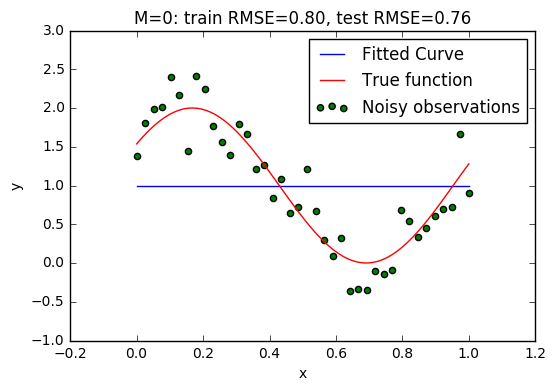

Evaluated polynomial: [ 1.83684385  1.819837    1.80283015  1.7858233   1.76881645  1.75180959
  1.73480274  1.71779589  1.70078904  1.68378219  1.66677534  1.64976849
  1.63276164  1.61575479  1.59874794  1.58174108  1.56473423  1.54772738
  1.53072053  1.51371368  1.49670683  1.47969998  1.46269313  1.44568628
  1.42867943  1.41167258  1.39466572  1.37765887  1.36065202  1.34364517
  1.32663832  1.30963147  1.29262462  1.27561777  1.25861092  1.24160407
  1.22459722  1.20759036  1.19058351  1.17357666  1.15656981  1.13956296
  1.12255611  1.10554926  1.08854241  1.07153556  1.05452871  1.03752185
  1.020515    1.00350815  0.9865013   0.96949445  0.9524876   0.93548075
  0.9184739   0.90146705  0.8844602   0.86745335  0.85044649  0.83343964
  0.81643279  0.79942594  0.78241909  0.76541224  0.74840539  0.73139854
  0.71439169  0.69738484  0.68037799  0.66337113  0.64636428  0.62935743
  0.61235058  0.59534373  0.57833688  0.56133003  0.54432318  0.52731633
  0.51030948  0.49330262  0.4

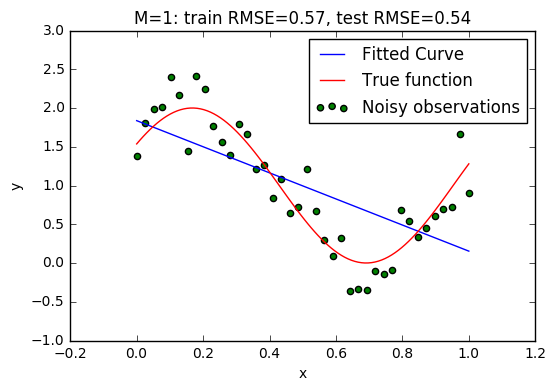

Evaluated polynomial: [ 2.15780157  2.11913228  2.08090508  2.04311998  2.00577696  1.96887604
  1.93241721  1.89640046  1.86082581  1.82569325  1.79100278  1.75675439
  1.7229481   1.6895839   1.65666179  1.62418177  1.59214385  1.56054801
  1.52939426  1.4986826   1.46841304  1.43858556  1.40920018  1.38025688
  1.35175568  1.32369656  1.29607954  1.26890461  1.24217176  1.21588101
  1.19003235  1.16462578  1.1396613   1.11513891  1.09105861  1.0674204
  1.04422428  1.02147026  0.99915832  0.97728847  0.95586072  0.93487505
  0.91433148  0.89422999  0.8745706   0.85535329  0.83657808  0.81824496
  0.80035393  0.78290498  0.76589813  0.74933337  0.7332107   0.71753012
  0.70229163  0.68749524  0.67314093  0.65922871  0.64575858  0.63273055
  0.6201446   0.60800075  0.59629898  0.58503931  0.57422172  0.56384623
  0.55391283  0.54442152  0.53537229  0.52676516  0.51860012  0.51087717
  0.50359631  0.49675754  0.49036087  0.48440628  0.47889378  0.47382337
  0.46919506  0.46500883  0.46

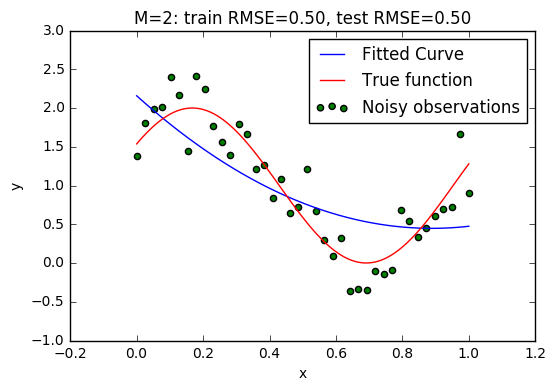

Evaluated polynomial: [  1.58280389e+00   1.63723152e+00   1.68711262e+00   1.73255005e+00
   1.77364667e+00   1.81050533e+00   1.84322890e+00   1.87192022e+00
   1.89668216e+00   1.91761758e+00   1.93482934e+00   1.94842029e+00
   1.95849329e+00   1.96515120e+00   1.96849687e+00   1.96863318e+00
   1.96566296e+00   1.95968909e+00   1.95081442e+00   1.93914181e+00
   1.92477412e+00   1.90781420e+00   1.88836491e+00   1.86652911e+00
   1.84240966e+00   1.81610943e+00   1.78773125e+00   1.75737800e+00
   1.72515253e+00   1.69115771e+00   1.65549638e+00   1.61827140e+00
   1.57958564e+00   1.53954196e+00   1.49824320e+00   1.45579224e+00
   1.41229192e+00   1.36784511e+00   1.32255466e+00   1.27652343e+00
   1.22985428e+00   1.18265007e+00   1.13501365e+00   1.08704789e+00
   1.03885565e+00   9.90539771e-01   9.42203123e-01   8.93948562e-01
   8.45878946e-01   7.98097134e-01   7.50705983e-01   7.03808352e-01
   6.57507098e-01   6.11905080e-01   5.67105156e-01   5.23210185e-01
   4.8032302

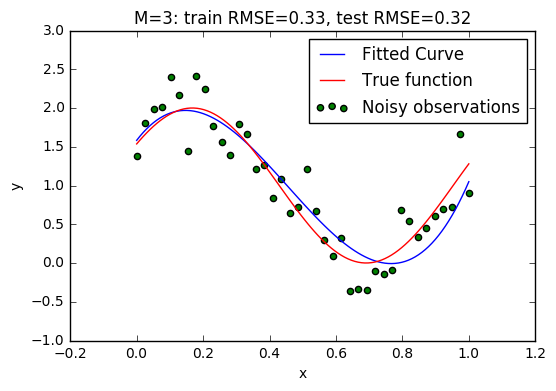

Evaluated polynomial: [ 1.50601907  1.58807214  1.66275393  1.73030715  1.79097161  1.84498417
  1.89257883  1.93398662  1.96943571  1.9991513   2.02335574  2.0422684
  2.05610579  2.06508148  2.06940613  2.06928749  2.0649304   2.05653677
  2.04430562  2.02843303  2.00911219  1.98653336  1.9608839   1.93234825
  1.90110793  1.86734155  1.83122482  1.79293051  1.7526285   1.71048575
  1.6666663   1.62133128  1.57463891  1.52674449  1.47780041  1.42795614
  1.37735826  1.3261504   1.27447331  1.2224648   1.17025979  1.11799026
  1.06578529  1.01377107  0.96207083  0.91080492  0.86009076  0.81004287
  0.76077284  0.71238937  0.66499822  0.61870225  0.5736014   0.52979272
  0.4873703   0.44642536  0.4070462   0.36931817  0.33332375  0.29914249
  0.26685102  0.23652307  0.20822943  0.18203801  0.1580138   0.13621884
  0.11671231  0.09955044  0.08478655  0.07247106  0.06265148  0.05537237
  0.05067543  0.0485994   0.04918013  0.05245055  0.05844069  0.06717764
  0.07868559  0.09298583  0.11

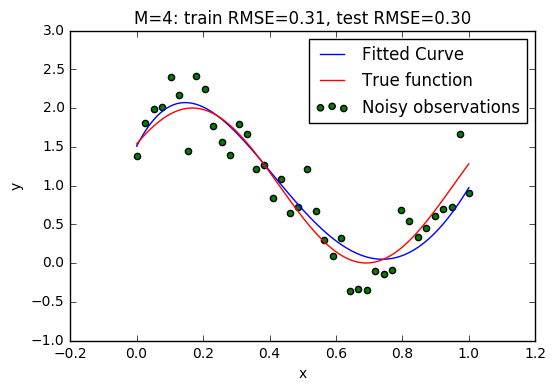

Evaluated polynomial: [ 1.44546159  1.57868024  1.69592597  1.79819039  1.88642647  1.9615493
  2.02443683  2.07593065  2.1168367   2.14792606  2.1699357   2.18356919
  2.18949749  2.18835971  2.18076383  2.16728748  2.14847865  2.1248565
  2.09691209  2.06510909  2.0298846   1.99164985  1.95079099  1.90766981
  1.8626245   1.81597042  1.76800083  1.71898767  1.66918228  1.61881616
  1.56810173  1.5172331   1.46638677  1.41572244  1.36538373  1.31549891
  1.26618174  1.21753209  1.16963683  1.12257046  1.07639596  1.03116548
  0.98692112  0.94369566  0.90151335  0.86039061  0.82033683  0.78135511
  0.74344297  0.70659317  0.67079442  0.63603212  0.60228916  0.56954664
  0.53778461  0.50698284  0.4771216   0.44818235  0.42014853  0.39300632
  0.36674536  0.34135955  0.31684774  0.29321454  0.27047103  0.24863553
  0.22773436  0.20780257  0.18888473  0.17103563  0.15432107  0.1388186
  0.12461826  0.11182338  0.10055127  0.09093399  0.08311913  0.07727055
  0.0735691   0.07221342  0.0734

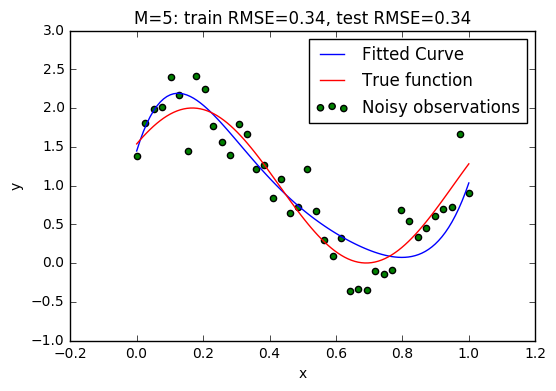

Evaluated polynomial: [ 1.40087866  1.63993145  1.83679203  1.99591786  2.12144954  2.21722462
  2.28679101  2.33342027  2.3601205   2.36964899  2.36452461  2.34703993
  2.31927302  2.28309898  2.24020128  2.19208268  2.140076    2.08535451
  2.02894216  1.9717234   1.91445285  1.85776459  1.80218122  1.74812268
  1.69591471  1.64579709  1.59793159  1.55240966  1.50925978  1.46845464
  1.42991793  1.39353093  1.3591388   1.32655658  1.29557494  1.26596562
  1.23748662  1.20988711  1.18291206  1.15630656  1.12981994  1.10320954
  1.07624422  1.04870763  1.02040116  0.99114665  0.96078876  0.92919715
  0.89626832  0.8619272   0.82612845  0.78885747  0.75013121  0.70999856
  0.66854065  0.62587066  0.58213357  0.53750544  0.49219258  0.4464303
  0.40048146  0.35463478  0.30920276  0.26451942  0.22093773  0.17882674
  0.13856849  0.1005546   0.06518256  0.03285182  0.00395955 -0.0211039
 -0.04195975 -0.05824586 -0.06962206 -0.07577579 -0.07642799 -0.07133922
 -0.06031617 -0.04321833 -0.019

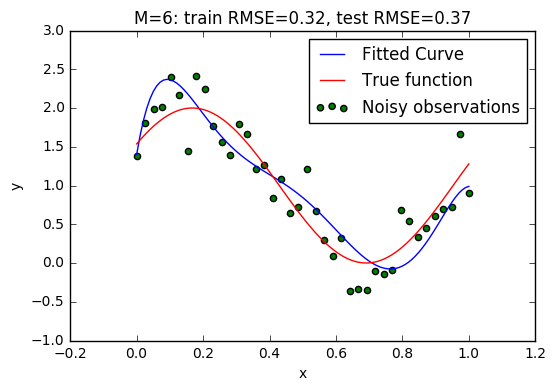

Evaluated polynomial: [ 1.42874408  1.41119045  1.4358553   1.4919003   1.56996095  1.66202329
  1.76130676  1.8621529   1.95991992  2.05088286  2.13213933  2.20152052
  2.25750761  2.29915315  2.3260075   2.33805004  2.33562513  2.31938263
  2.29022277  2.24924546  2.19770356  2.13696036  2.06845079  1.99364648
  1.91402434  1.83103871  1.74609672  1.66053699  1.5756113   1.49246919
  1.4121454   1.33554991  1.26346055  1.19651795  1.13522275  1.07993491
  1.03087502  0.98812741  0.95164499  0.92125564  0.89667     0.87749062
  0.86322219  0.85328285  0.84701633  0.84370485  0.84258267  0.84285007
  0.84368765  0.8442709   0.84378475  0.84143815  0.83647829  0.82820465
  0.81598245  0.7992555   0.77755834  0.75052747  0.7179115   0.67958024
  0.63553239  0.58590185  0.53096246  0.47113102  0.40696843  0.33917893
  0.26860712  0.19623284  0.12316358  0.05062435 -0.020055   -0.08745542
 -0.15008709 -0.20641098 -0.25486367 -0.29388543 -0.32195178 -0.33760879
 -0.33951193 -0.32646904 -0.2

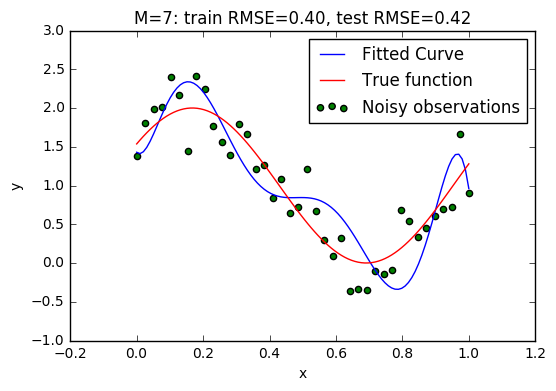

Evaluated polynomial: [ 1.43617984  0.98256181  0.74435441  0.6711489   0.72015402  0.85540435
  1.0470243   1.27054531  1.50627398  1.7387087   1.95600251  2.14947015
  2.31313686  2.44332705  2.53829055  2.59786468  2.62316991  2.61633733
  2.58026606  2.51840869  2.43458309  2.33280877  2.21716614  2.09167714
  1.96020546  1.8263751   1.69350547  1.56456195  1.44212023  1.32834332
  1.22496982  1.13331228  1.05426448  0.98831643  0.93557619  0.89579715
  0.86841024  0.85255966  0.84714168  0.85084536  0.86219457  0.87959058
  0.90135442  0.92576856  0.95111713  0.97572426  0.99799014  1.0164241
  1.02967459  1.03655567  1.03606952  1.02742508  1.01005229  0.98361208
  0.94800181  0.90335624  0.85004399  0.78865963  0.72001139  0.64510474
  0.56512203  0.48139846  0.39539464  0.30866617  0.22283062  0.13953231
  0.06040556 -0.01296327 -0.07907407 -0.13655123 -0.18418087 -0.22094648
 -0.2460621  -0.25900218 -0.25952722 -0.24770424 -0.22392105 -0.18889335
 -0.14366343 -0.08958941 -0.02

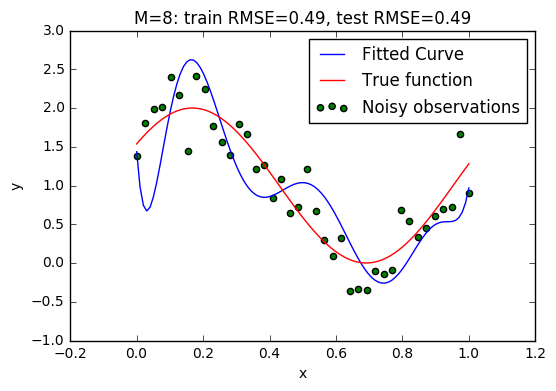

Evaluated polynomial: [ 1.43667552  0.57183917  0.10664806 -0.05896088 -0.00792195  0.19182277
  0.48538192  0.82915576  1.18924757  1.54003392  1.86288285  2.14500937
  2.37845822  2.55920432  2.68636164  2.76149194  2.78800493  2.77064213
  2.71503691  2.62734365  2.51392946  2.38112207  2.23500808  2.08127601
  1.92509892  1.77105187  1.6230595   1.48436977  1.35754983  1.24450044
  1.14648573  1.0641752   0.99769521  0.9466876   0.91037302  0.88761709
  0.8769976   0.87687119  0.8854381   0.900804    0.92103777  0.9442245
  0.96851325  0.99215879  1.01355733  1.03127592  1.04407538  1.05092705
  1.05102335  1.04378247  1.02884761  1.00608105  0.97555375  0.93753079
  0.8924535   0.84091866  0.78365559  0.72150175  0.65537749  0.58626064
  0.51516157  0.44309936  0.37107964  0.30007465  0.23100597  0.16473037
  0.10202907  0.04360066 -0.00994213 -0.0580719  -0.10034215 -0.13637945
 -0.16587233 -0.18855751 -0.20420406 -0.21259646 -0.21351735 -0.20673142
 -0.19197167 -0.16892966 -0.13

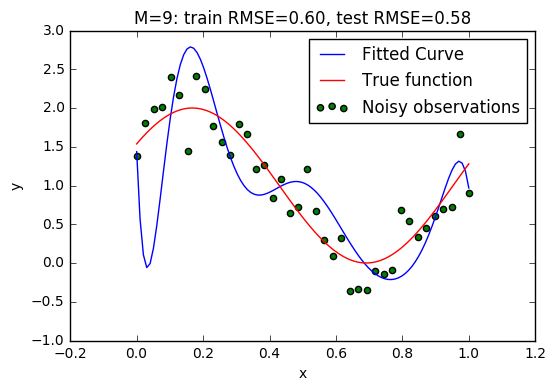

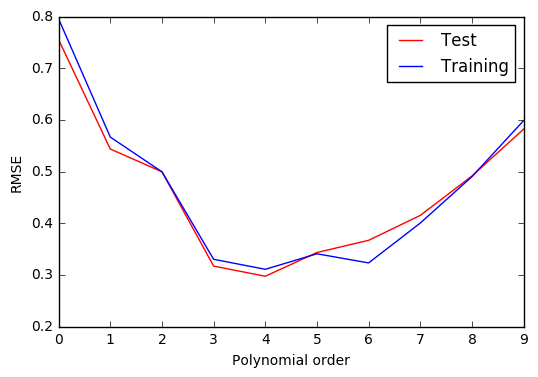

[0.79533425977533445, 0.56664305600373432, 0.49940602331377165, 0.3300904298868258, 0.31069735194240367, 0.34073654621601407, 0.32309767642403708, 0.40022490843416481, 0.49006000518845966, 0.59857200458598037]
[0.75507127792556628, 0.54348013346841395, 0.49947083843613266, 0.31692708260180236, 0.29726404203594275, 0.3432377613407912, 0.36679464245879395, 0.41507529249839298, 0.49125136377856093, 0.58199341272363581]


In [49]:
# Generating data set D_40 of 40 noisy observations
training_set_40 = generate_data(40)
full_training_set_40 = np.vstack((np.linspace(0, 1, 40), training_set_40))

evaluate_and_plot_curve_fitting(full_training_set_40, full_test_set)

## Exercise 1.5

[  1.43667552e+00  -1.09172964e+02   2.53526250e+03  -2.10047308e+04
   8.80563451e+04  -2.12341753e+05   3.08196494e+05  -2.66715540e+05
   1.27105551e+05  -2.57229261e+04]
[ 1.81108089 -1.13774698 -1.25354931 -0.65670679 -0.13509607  0.24496082
  0.51095209  0.69349266  0.81597723]


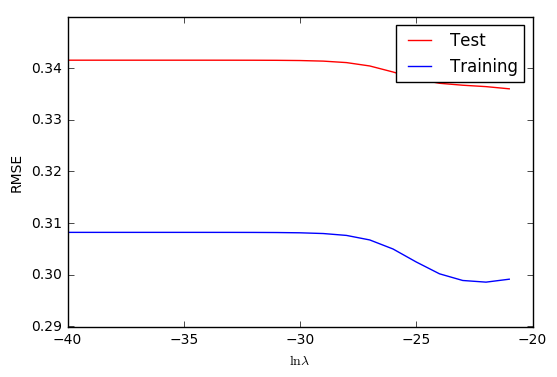

In [58]:
def pol_cur_fit_with_regularization(data, polynomial_order, regularizer = 0.00):
    """ Return weights for an optimal polynomial curve fit. """
    
    observations = data[0, :] # Get me the first row, D_N
    targets = data[1, :] # Get me the second row, M
    
    # observation matrix
    A = np.zeros((polynomial_order, polynomial_order)) # Create matrix
    for i in range(polynomial_order):
        for j in range(polynomial_order):
            A[i, j] = np.sum(observations ** (i+j))
    
    # Regularization
    # Multiply the diagonal matrix of order m with regularization term and add it to A
    A = A + ( regularizer * np.identity(polynomial_order) )
    
    # target vector        
    B = np.zeros(polynomial_order)
    for i in range(polynomial_order):
        B[i] = np.sum(targets * observations**i)
    
    # numpy.linalg.solve(a, b)
    # Solve a linear matrix equation, or system of linear scalar equations.
    # Computes the “exact” solution, x, of the well-determined, i.e., full rank, linear matrix equation ax = b.
    
    # Here's where the magic happens. Solve the linear system.
    weights = np.linalg.solve(A, B)
    return weights


def evaluate_and_plot_curve_fitting_with_reg(training_set, 
                                             test_set,
                                             reg = 0.1):
    """Evaluate the RMSE based on different polynomial orders"""
    
    errors_train = []
    errors_test = []
    
    regularizer_range = np.arange(-40, -20)
    exp_regularizer_range = np.exp(regularizer_range) # perform e^x because Bishop uses ln lambda
    
    for regularizer_value in exp_regularizer_range:
        w = pol_cur_fit_with_regularization(training_set, 9, regularizer_value) # fix polynomial order to 9
        rmse_train = RMSE(evaluate_polynomial(training_set[0, :], w), training_data[1, :])
        rmse_test = RMSE(evaluate_polynomial(test_set[0, :], w), test_set[1, :])
        errors_train.append(rmse_train)
        errors_test.append(rmse_test)
        
    plt.figure()    
        
    plt.plot(regularizer_range, errors_test, 'r', label='Test')
    plt.plot(regularizer_range, errors_train, 'b', label='Training')
    #plt.ylim([0, 0.4])
    plt.legend()
    plt.xlabel(r'$\ln {\lambda}$')
    plt.ylabel("RMSE")
    plt.savefig("rmse_polynomial_order_reg.png")
    plt.show()
        
        
weights = w = pol_cur_fit(training_data, 9)
weights_regularized = pol_cur_fit_with_regularization(training_data, 9, 0.1)

print(weights)
print(weights_regularized)
        
evaluate_and_plot_curve_fitting_with_reg(full_training_set, full_test_set)

